In [13]:
import cv2
import sys
import os
import re
import traceback
import numpy as np

from matplotlib import pyplot as plt

import sys
sys.path.append('D:\\Prj\\chromo-tech-test\\tools_4_training')
from chromo_cv_utils import Metaphaser, metafer_img_clean, opening, find_external_contours

In [14]:
# img_fp = 'D:\\download\\L2311245740.008.K.TIF'
img_fp = 'D:\\Prj\\github\\woodpecker\\test\\test_img\\L2311245738.006.K.TIF'
img_dir, img_fn = os.path.split(img_fp)
img_fbasename = os.path.splitext(img_fn)[0]
img_fext = os.path.splitext(img_fp)[1]
img_dir, img_fn, img_fbasename, img_fext

('D:\\Prj\\github\\woodpecker\\test\\test_img',
 'L2311245738.006.K.TIF',
 'L2311245738.006.K',
 '.TIF')

In [15]:
fp = open(img_fp, "rb")
if not fp:
    print("open file error")

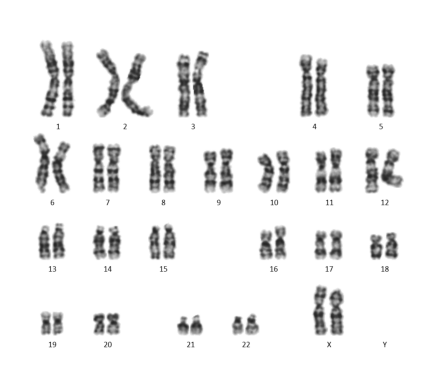

In [16]:
img = cv2.imread(img_fp)

# Check if the image was loaded successfully
if img is not None:
    # Display the loaded image
    plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis labels
    plt.show()
else:
    print("Failed to load the image.")

D:\Prj\github\woodpecker\test\test_img\L2311245738.006.K_output2.png


True

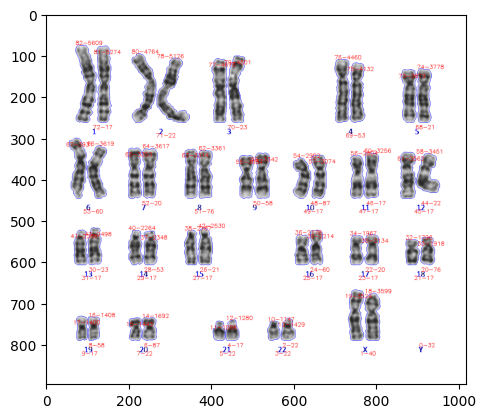

In [19]:
# 查看所有轮廓的面积大小
contours = find_external_contours(img, 254)
contours = [ contour for contour in contours if cv2.contourArea(contour) > 13 ]
canvas = img.copy()
cv2.drawContours(canvas, contours, -1, (0,0,255), 1)
for idx, cnt in enumerate(contours):
    cntArea = int(cv2.contourArea(cnt))
    (x,y,w,h) = cv2.boundingRect(cnt)
    if idx % 2 == 0:        
        cv2.putText(canvas,str(idx)+'-'+str(cntArea),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,0,0),1)
    else:
        cv2.putText(canvas,str(idx)+'-'+str(cntArea),(x-8,y+20),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,0,0),1)

plt.imshow(canvas) 
fp = os.path.join(img_dir, img_fbasename) + '_output2' + '.png'
print(fp)
cv2.imwrite(fp, canvas)

In [44]:
# 查看所有image的轮廓总数
img_dir = 'D:\\tmp\\chk_rep_kms_number'
img_fps = []
for fn in os.listdir(img_dir):
    img_fps.append(os.path.join(img_dir, fn))

In [47]:
for img_fp in img_fps:
    img = cv2.imread(img_fp)
    contours = find_external_contours(img, 254)
    contours = [ contour for contour in contours if cv2.contourArea(contour) > 13 ]
    print(f'{os.path.split(img_fp)[1]}-{len(contours)}')

L2311245727.001.K.TIF-85
L2311245727.016.K.TIF-83
L2311245728.012.K.TIF-83
L2311245728.025.K.TIF-83
L2311245728.066.K.TIF-83
L2311245730.011.K.TIF-83
L2311245732.007.K.TIF-83
L2311245732.014.K.TIF-83
L2311245733.038.K.TIF-86
L2311245733.066.K.TIF-83
L2311245734.033.K.TIF-83
L2311245734.049.K.TIF-84
L2311245734.060.K.TIF-83
L2311245735.032.K.TIF-84
L2311245738.006.K.TIF-83
L2311245738.011.K.TIF-83
L2311245739.030.K.TIF-84
L2311245740.008.K.TIF-84
L2311245740.031.K.TIF-83
L2311245742.008.K.TIF-83
L2311245743.026.K.TIF-86
L2311245744.001.K.TIF-85
L2311245744.033.K.TIF-84
L2311245745.001.K.TIF-83
L2311245745.028.K.TIF-86
L2311245747.054.K.TIF-86
L2311245748.016.K.TIF-84
L2311245748.025.K.TIF-84
L2311245749.049.K.TIF-83
L2311245750.047.K.TIF-84
L2311245751.053.K.TIF-84
L2311245751.060.K.TIF-83
L2311245752.003.K.TIF-83
L2311245752.017.K.TIF-82
L2311245753.008.K.TIF-83
L2311245754.013.K.TIF-85
L2311245754.056.K.TIF-83
L2311245755.032.K.TIF-83
L2311245758.015.K.TIF-84
L2311245758.024.K.TIF-83


True

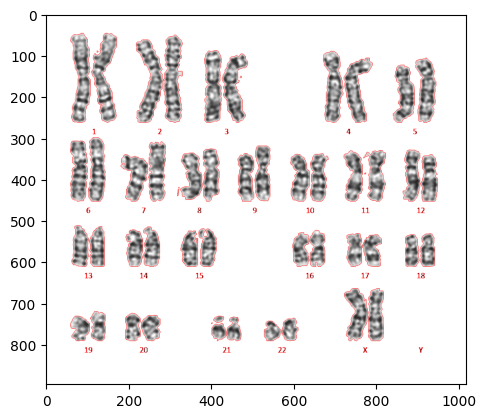

In [86]:
img = 'D:\\tmp\\chk_rep_kms_number\\L2311245727.001.K.TIF'
img = cv2.imread(img)
contours = find_external_contours(img, 254)
canvas = img.copy()
cv2.drawContours(canvas, contours, -1, (255,0,0), 1)
plt.imshow(canvas) 
fp = os.path.join(img_dir, img_fbasename) + '_only_contour' + '.png'
cv2.imwrite(fp, canvas)

True

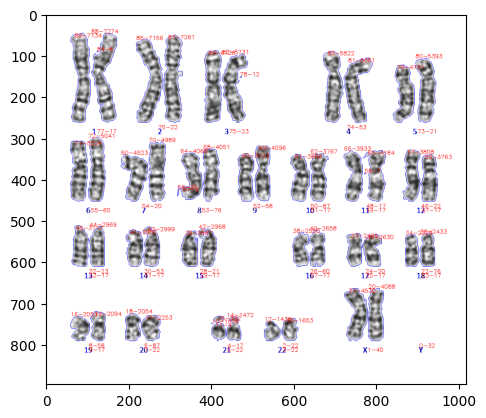

In [51]:
# 合并轮廓
img = 'D:\\tmp\\chk_rep_kms_number\\L2311245727.001.K.TIF'
img = cv2.imread(img)
contours = find_external_contours(img, 254)
canvas = img.copy()
cv2.drawContours(canvas, contours, -1, (0,0,255), 1)
for i, cnt in enumerate(contours):
    cntArea = int(cv2.contourArea(cnt))
    (x,y,w,h) = cv2.boundingRect(cnt)
    # cv2.putText(image, text, (5,50 ), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    if i % 2 == 0:        
        cv2.putText(canvas,str(i)+'-'+str(cntArea),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,0,0),1)
    else:
        cv2.putText(canvas,str(i)+'-'+str(cntArea),(x+10,y+10),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,0,0),1)

plt.imshow(canvas) 
fp = os.path.join(img_dir, img_fbasename) + '_output3' + '.png'
cv2.imwrite(fp, canvas)

True

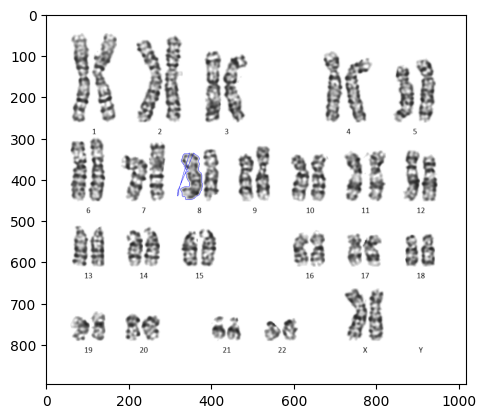

In [53]:
# 接上面
# 轮廓合并
merged_contour = np.concatenate((contours[56], contours[64]))
canvas = img.copy()
cv2.drawContours(canvas, [merged_contour], -1, (0,0,255), 1)
plt.imshow(canvas)
fp = os.path.join(img_dir, img_fbasename) + '_output4' + '.png'
cv2.imwrite(fp, canvas)

True

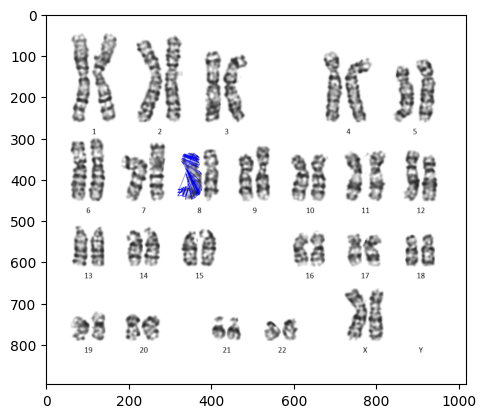

In [54]:
#接上面
#从两个轮廓边缘最接近的地方合并轮廓
two_contours = [contours[56], contours[64]]

contour1 = two_contours[0]
contour2 = two_contours[1]

points1 = contour1[:, 0, :]  # Points of the first contour
points2 = contour2[:, 0, :]  # Points of the second contour

# Initialize variables to store the closest points and their distances
closest_point1 = None
closest_point2 = None
min_distance = float('inf')

# Loop through each point in the first contour
for point1 in points1:
    # Calculate the distances to all points in the second contour
    distances = np.linalg.norm(points2 - point1, axis=1)

    # Find the index of the closest point in the second contour
    min_index = np.argmin(distances)

    # Get the closest point in the second contour
    closest_point2 = points2[min_index]

    # Calculate the distance between the two closest points
    distance = distances[min_index]

    # Check if this distance is smaller than the current minimum
    if distance < min_distance:
        min_distance = distance
        closest_point1 = point1

# Create a new contour by concatenating points from both contours
merged_contour = np.concatenate((points1, points2))

# Sort the merged contour based on distance to closest_point1
merged_contour = merged_contour[np.argsort(np.linalg.norm(merged_contour - closest_point1, axis=1))]

# Draw the merged contour on a blank image (optional)
canvas = img.copy()
cv2.drawContours(canvas, [merged_contour], -1, (0,0,255), 1)
plt.imshow(canvas)
fp = os.path.join(img_dir, img_fbasename) + '_output5' + '.png'
cv2.imwrite(fp, canvas)

In [55]:
closest_point1, closest_point2

(array([322, 424], dtype=int32), array([325, 424], dtype=int32))

In [57]:
# Define the two points
# compare two method of calculate distance of two points
closest_point1 = np.array([322, 424], dtype=np.int32)
closest_point2 = np.array([325, 424], dtype=np.int32)

# Calculate the Euclidean distance between the two points
distance = np.linalg.norm(closest_point1 - closest_point2)
distance2 = pow((pow((322-325),2)+pow((424-424),2)),0.5)

# Print the distance
# print("Distance between closest_point1 and closest_point2:", distance)
distance, distance2

(3.0, 3.0)

In [80]:
# 上面的算法不对
# 1. 先验证，求两个轮廓上最接近的两点
two_contours = [contours[56], contours[64]]

contour1 = two_contours[0]
contour2 = two_contours[1]

points1 = contour1[:, 0, :]  # Points of the first contour
points2 = contour2[:, 0, :]  # Points of the second contour

# Initialize variables to store the closest points and their distances
closest_point1 = None
closest_point2 = None
min_distance = float('inf')
closest_point1_index = 0
closest_point2_index = 0

# Loop through each point in the first contour
for i, point1 in enumerate(points1):
    for j, point2 in enumerate(points2):
        distance = np.linalg.norm(point1 - point2)
        if distance < min_distance:
            min_distance = distance
            closest_point1 = point1
            closest_point2 = point2
            closest_point1_index = i
            closest_point2_index = j

# print
# min_distance, closest_point1, closest_point2, closest_point1_index, closest_point2_index, contour1[closest_point1_index],contour2[closest_point2_index]
min_distance, closest_point1, closest_point2, closest_point1_index, closest_point2_index, contour1[closest_point1_index],contour2[closest_point2_index]


(3.0,
 array([322, 424], dtype=int32),
 array([325, 424], dtype=int32),
 13,
 62,
 array([[322, 424]], dtype=int32),
 array([[325, 424]], dtype=int32))

In [75]:
closest_point1

array([322, 424], dtype=int32)

In [81]:
reorganized_contour1 = np.concatenate((contour1[13:], contour1[:13]))
joint_contour = np.insert(contour2, 62, reorganized_contour1, axis=0)
# contour1, reorganized_contour1, contour2, joint_contour, joint_contour[140:]

True

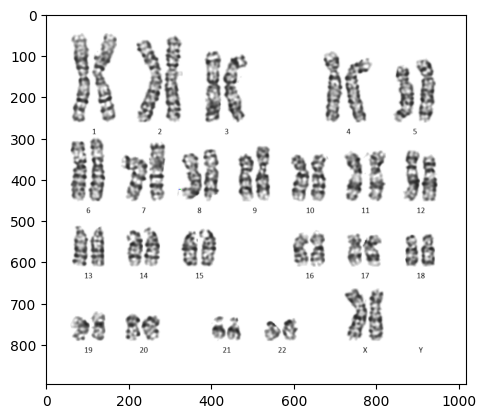

In [82]:
# draw point
canvas = img.copy()
point1 = closest_point1
cv2.circle(canvas, point1, 1, (0,0,255), -1) 
point2 = closest_point2
cv2.circle(canvas, point2, 1, (0,255,0), -1) 
plt.imshow(canvas)
fp = os.path.join(img_dir, img_fbasename) + '_closest_points' + '.png'
cv2.imwrite('karyotype_chart_process_closest_points.png', canvas)

True

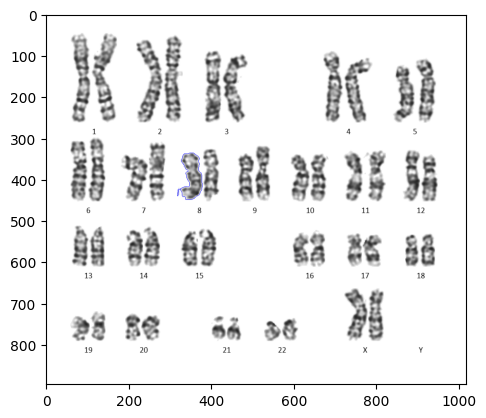

In [83]:
# draw the joint contour
# Draw the merged contour on a blank image (optional)
canvas = img.copy()
cv2.drawContours(canvas, [joint_contour], -1, (0,0,255), 1)
plt.imshow(canvas)
fp = os.path.join(img_dir, img_fbasename) + '_joint_contour' + '.png'
cv2.imwrite(fp, canvas)

In [72]:
# check order of points on a contour
for point in contour2:
    # Create a copy of the image to draw on
    img_copy = img.copy()

    # Draw the current point on the copy of the image
    cv2.drawContours(img_copy, [point], -1, (0, 0, 255), 2)  # You can change the color and thickness

    # Show the image with the current point drawn
    cv2.imshow("Drawing Contour Slowly", img_copy)
    cv2.waitKey(300)  # Delay in milliseconds

In [73]:
contour2

array([[[347, 336]],

       [[346, 337]],

       [[344, 337]],

       [[343, 338]],

       [[334, 338]],

       [[334, 339]],

       [[333, 340]],

       [[332, 340]],

       [[332, 341]],

       [[331, 342]],

       [[331, 343]],

       [[330, 344]],

       [[330, 348]],

       [[329, 349]],

       [[329, 350]],

       [[327, 352]],

       [[327, 357]],

       [[330, 360]],

       [[330, 361]],

       [[331, 361]],

       [[332, 362]],

       [[332, 364]],

       [[333, 364]],

       [[334, 365]],

       [[334, 369]],

       [[337, 372]],

       [[337, 374]],

       [[339, 376]],

       [[340, 376]],

       [[341, 377]],

       [[342, 377]],

       [[344, 379]],

       [[344, 380]],

       [[343, 381]],

       [[341, 381]],

       [[338, 384]],

       [[338, 387]],

       [[339, 388]],

       [[339, 389]],

       [[340, 390]],

       [[340, 396]],

       [[341, 397]],

       [[341, 398]],

       [[342, 399]],

       [[342, 401]],

       [[3

In [32]:
meta__just_fit_chromos_img.shape

(630, 616, 3)

In [33]:
new_img_h, new_img_w = meta__just_fit_chromos_img.shape[:2]
dst_h, dst_w = 1024, 1280
(new_img_h / dst_h), (new_img_w / dst_w)

(0.615234375, 0.48125)

In [34]:
if (new_img_h / dst_h) > (new_img_w / dst_w):
    new_img_w = int(new_img_w * dst_h / new_img_h)
    new_img_h = dst_h
else:
    new_img_h = int(new_img_h * dst_w / new_img_w)
    new_img_w = dst_w
new_img_h, new_img_w

(1024, 1001)

In [35]:
# 通过计算方差区分 细胞和 染色体团

In [36]:
# 去除图片边框
no_border_img = metafer_img_clean(
    tst_img,
    0,
    0,
    (254,254,254),
    (254,254,254)
)

# 灰化
no_border_gray_img = cv2.cvtColor(no_border_img, cv2.COLOR_BGR2GRAY)

# 二值化
# 方法1： 直接指定二值化阈值
# tmp_img = cv2.threshold(no_border_gray_img, self.bin_thresh, 255, cv2.THRESH_BINARY_INV)[1]
# 方法2：采用OTSU方法的自适应二值化阈值
# bin_thresh, tmp_img = cv2.threshold(no_border_gray_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# 方法3：在TRIANGLE方法基础上进行校正后的二值化阈值
bin_thresh, bin_img = cv2.threshold(
    no_border_gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE
)

bin_thresh2, tmp_img = cv2.threshold(
    no_border_gray_img, bin_thresh-15, 255, cv2.THRESH_BINARY_INV)

# 开运算,去噪点
tmp_img = opening(tmp_img, kernel=np.ones((5, 5), np.uint8), iterations=1)

# 找轮廓
contours = cv2.findContours(tmp_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [37]:
bin_thresh, bin_thresh-20

(244.0, 224.0)

In [38]:
# 去小轮廓
contours = [ cnt for cnt in contours if cv2.contourArea(cnt) > 100 ]

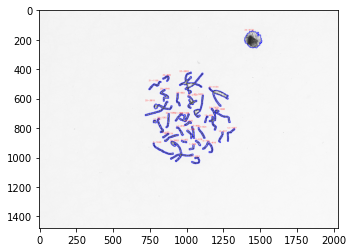

In [39]:
all_contours_canvas = no_border_img.copy()
cv2.drawContours(all_contours_canvas, contours, -1, (0,0,255), 2)
for idx, cnt in enumerate(contours):
    cntArea = int(cv2.contourArea(cnt))
    (x,y,w,h) = cv2.boundingRect(cnt)
    # cv2.putText(image, text, (5,50 ), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    cv2.putText(all_contours_canvas,str(idx)+'-'+str(cntArea),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,0,0),1)

plt.imshow(all_contours_canvas) 

In [40]:
# cv2.imwrite('.\\results\\all_contours_canvas.png', all_contours_canvas)

True

In [41]:
# 针对所有轮廓求方差
mean_stddv_of_contours = [ {} for cnt in contours ]
for idx, cnt in enumerate(contours):
    mask = np.zeros(no_border_gray_img.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, 255, -1)
    (mean , stddv) = cv2.meanStdDev(no_border_gray_img, mask=mask)
    mean_stddv_of_contours[idx]['mean'] = int(mean)
    mean_stddv_of_contours[idx]['stddv'] = int(stddv)
    mean_stddv_of_contours[idx]['contour'] = cnt
    mean_stddv_of_contours[idx]['area'] = int(cv2.contourArea(cnt))

In [42]:
for idx in range(len(mean_stddv_of_contours)):
    mean = mean_stddv_of_contours[idx]['mean']
    stddv = mean_stddv_of_contours[idx]['stddv']
    area = mean_stddv_of_contours[idx]['area']
    print(f'{idx}-mean:{mean}-dv:{stddv}-area:{area}')

0-mean:144-dv:44-area:1053
1-mean:166-dv:34-area:599
2-mean:147-dv:46-area:816
3-mean:143-dv:43-area:1649
4-mean:159-dv:39-area:769
5-mean:150-dv:39-area:3993
6-mean:162-dv:40-area:402
7-mean:164-dv:35-area:578
8-mean:144-dv:42-area:1179
9-mean:150-dv:43-area:537
10-mean:148-dv:42-area:827
11-mean:153-dv:44-area:788
12-mean:145-dv:41-area:1087
13-mean:148-dv:42-area:924
14-mean:152-dv:44-area:818
15-mean:154-dv:36-area:890
16-mean:145-dv:42-area:645
17-mean:152-dv:43-area:377
18-mean:146-dv:46-area:1282
19-mean:147-dv:46-area:499
20-mean:155-dv:38-area:1468
21-mean:151-dv:40-area:818
22-mean:146-dv:40-area:1086
23-mean:149-dv:40-area:1698
24-mean:141-dv:43-area:2425
25-mean:146-dv:43-area:3815
26-mean:144-dv:47-area:2124
27-mean:150-dv:46-area:2602
28-mean:140-dv:42-area:993
29-mean:150-dv:41-area:1645
30-mean:157-dv:46-area:4134
31-mean:139-dv:44-area:1159
32-mean:140-dv:47-area:800
33-mean:146-dv:47-area:5802
34-mean:140-dv:60-area:9732


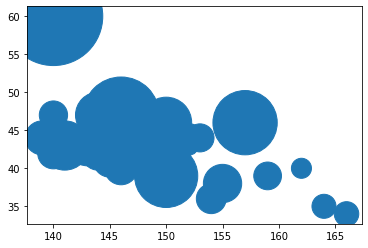

In [43]:
mean_lst = [ cnt['mean'] for cnt in  mean_stddv_of_contours ]
stddv_lst = [ cnt['stddv'] for cnt in  mean_stddv_of_contours ]
area_lst = [ cnt['area'] for cnt in  mean_stddv_of_contours ]
plt.scatter(mean_lst, stddv_lst, area_lst)
plt.show()

In [44]:
# 通过K-Mean对剩余轮廓的面积进行聚类
from sklearn.cluster import KMeans

In [45]:
mean_stddv_lst = [ 
    [cnt['mean'], cnt['stddv'], cnt['area']]
    for cnt in mean_stddv_of_contours 
]

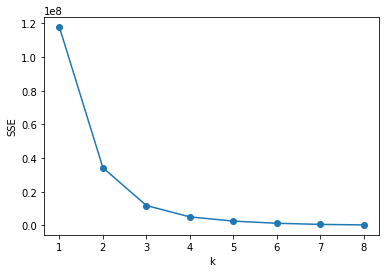

In [46]:
# 探测最优K值
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(mean_stddv_lst)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [47]:
SSE

[117658522.91428573,
 34285466.43333334,
 11847086.333333336,
 5096355.773291925,
 2608381.606625259,
 1312899.1019607843,
 644520.6857142857,
 333365.36904761905]

In [54]:
found_best_k = False
best_k_idx = -2
for idx in range(len(SSE)):
    next_idx = idx + 1
    if next_idx == len(SSE) - 1:
        break
    step_distance = SSE[idx] - SSE[next_idx]
    left_distance = SSE[next_idx] - SSE[len(SSE) - 1]
    if step_distance <= left_distance:
        found_best_k = True
        best_k_idx = idx
    print(f'{idx}-{idx+1}-{step_distance}-{left_distance}-{step_distance <= left_distance}')
found_best_k, best_k_idx, best_k_idx+1

0-1-83373056.4809524-33952101.06428572-False
1-2-22438380.1-11513720.964285716-False
2-3-6750730.560041411-4762990.404244306-False
3-4-2487974.166666666-2275016.23757764-False
4-5-1295482.5046644746-979533.7329131652-False
5-6-668378.4162464986-311155.31666666665-False


(False, -2, -1)

In [49]:
from sklearn.metrics import silhouette_score

d:\prj\chromo-tech-test\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\prj\chromo-tech-test\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24275 (\N{CJK UNIFIED IDEOGRAPH-5ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\prj\chromo-tech-test\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\prj\chromo-tech-test\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


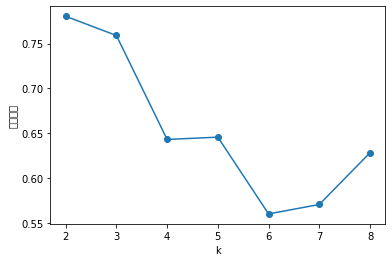

max_score: 0.7803957189017598, max_k: 2


In [50]:
# 轮廓系数（Silhouette Coefficient）法探测K值
# https://www.omegaxyz.com/2018/09/03/k-means-find-k/
Scores = []  # 存放轮廓系数
max_k = 0
max_score = 0
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(mean_stddv_lst)
    score = silhouette_score(mean_stddv_lst, estimator.labels_, metric='euclidean')
    Scores.append(score)
    if score > max_score:
        max_score = score
        max_k = k
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()
print(f'max_score: {max_score}, max_k: {max_k}')

In [51]:
# 开始分类
kmCluster = KMeans(n_clusters=2).fit(mean_stddv_lst)
kmCluster.cluster_centers_ ,kmCluster.labels_, kmCluster.n_iter_, kmCluster.inertia_, range(len(kmCluster.labels_))

(array([[ 149.13333333,   42.        , 1084.56666667],
        [ 147.8       ,   47.        , 5495.2       ]]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]),
 2,
 34285466.43333334,
 range(0, 35))

In [52]:
for idx, label in enumerate(kmCluster.labels_):
    print(f'{idx}-{label}')

0-0
1-0
2-0
3-0
4-0
5-1
6-0
7-0
8-0
9-0
10-0
11-0
12-0
13-0
14-0
15-0
16-0
17-0
18-0
19-0
20-0
21-0
22-0
23-0
24-0
25-1
26-0
27-0
28-0
29-0
30-1
31-0
32-0
33-1
34-1
